In [14]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/assests/feature_selected_voice_data.csv')

In [17]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.208274,male


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   kurt      3168 non-null   float64
 7   sp.ent    3168 non-null   float64
 8   sfm       3168 non-null   float64
 9   mode      3168 non-null   float64
 10  meanfun   3168 non-null   float64
 11  minfun    3168 non-null   float64
 12  modindx   3168 non-null   float64
 13  label     3168 non-null   object 
dtypes: float64(13), object(1)
memory usage: 346.6+ KB


In [19]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'kurt', 'sp.ent',
       'sfm', 'mode', 'meanfun', 'minfun', 'modindx', 'label'],
      dtype='object')

In [20]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,36.568461,0.895127,0.408216,0.165282,0.142807,0.036802,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,134.928661,0.044980,0.177521,0.077203,0.032304,0.019220,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,2.068455,0.738651,0.036876,0.000000,0.055565,0.009775,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,5.669547,0.861811,0.258041,0.118016,0.116998,0.018223,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,8.318463,0.901767,0.396335,0.186599,0.140519,0.046110,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,13.648905,0.928713,0.533676,0.221104,0.169581,0.047904,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,1309.612887,0.981997,0.842936,0.280000,0.237636,0.204082,0.932374


In [21]:
df.shape

(3168, 14)

In [22]:
df['label'].value_counts()

,count
label,
male,1584
female,1584


In [26]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Class distribution:

There are 2 gender categories in 'Gender label'

The count of each Class is shown as count in Bar plot

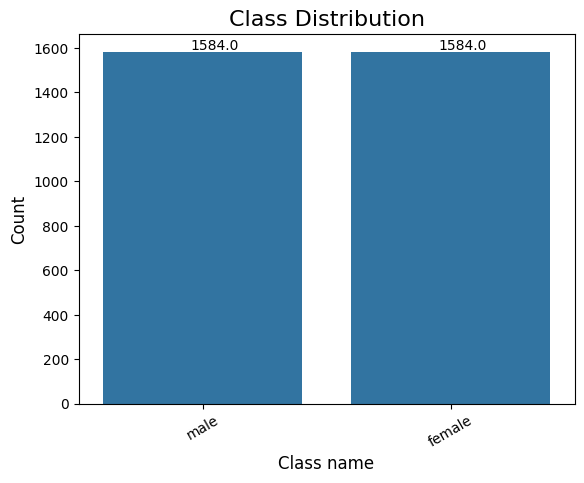

In [ ]:
y = sns.countplot(x=df['label'])
y.set_title("Class Distribution", fontsize=16)
y.set_xlabel("Class name", fontsize=12)
y.set_ylabel("Count", fontsize=12)
y.set_xticklabels(y.get_xticklabels(), rotation=30)

for bar in y.patches:
    y.annotate(bar.get_height(), xy=(bar.get_x()+0.35, bar.get_height()+10))

plt.show()

### Performing EDA on Dataset

In [ ]:
labelencoder = LabelEncoder()
df['label'] = labelencoder.fit_transform(df['label'])

correlation_matrix = df.corr()
print(correlation_matrix)

          meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.534462   
minfun    0.383937 -0.345609  0.337602  0.320994  0.258002 -0.222680   
modindx  -0.216979  0.122660 -0.213298 -0.141377 -0.216475  0.04

##### Scatter Plots on features 'meanfreq' & 'sd', denoting correlation between them

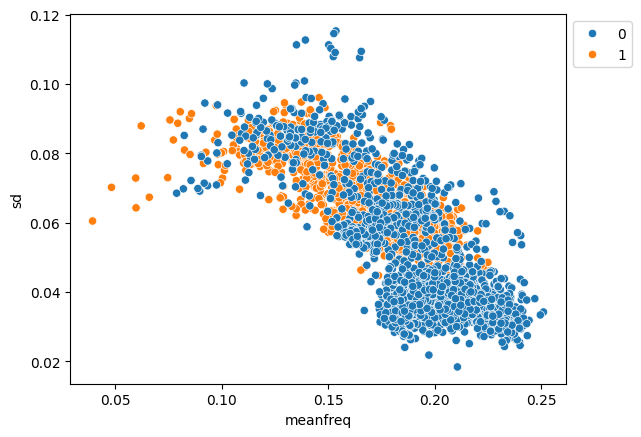

In [28]:
sns.scatterplot(x='meanfreq', y='sd',hue='label', data=df,marker='o')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

##### Scatter Plots on features 'meandom' & 'maxdom', denoting correlation between them

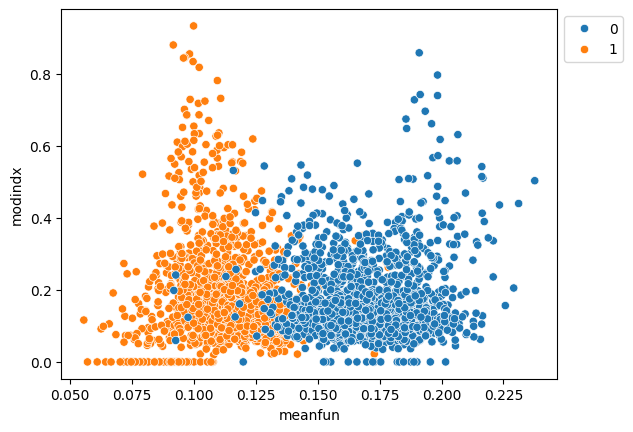

In [29]:
sns.scatterplot(x='meanfun', y='modindx',hue='label', data=df,marker='o')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

##### Histograms on all the features, over every class

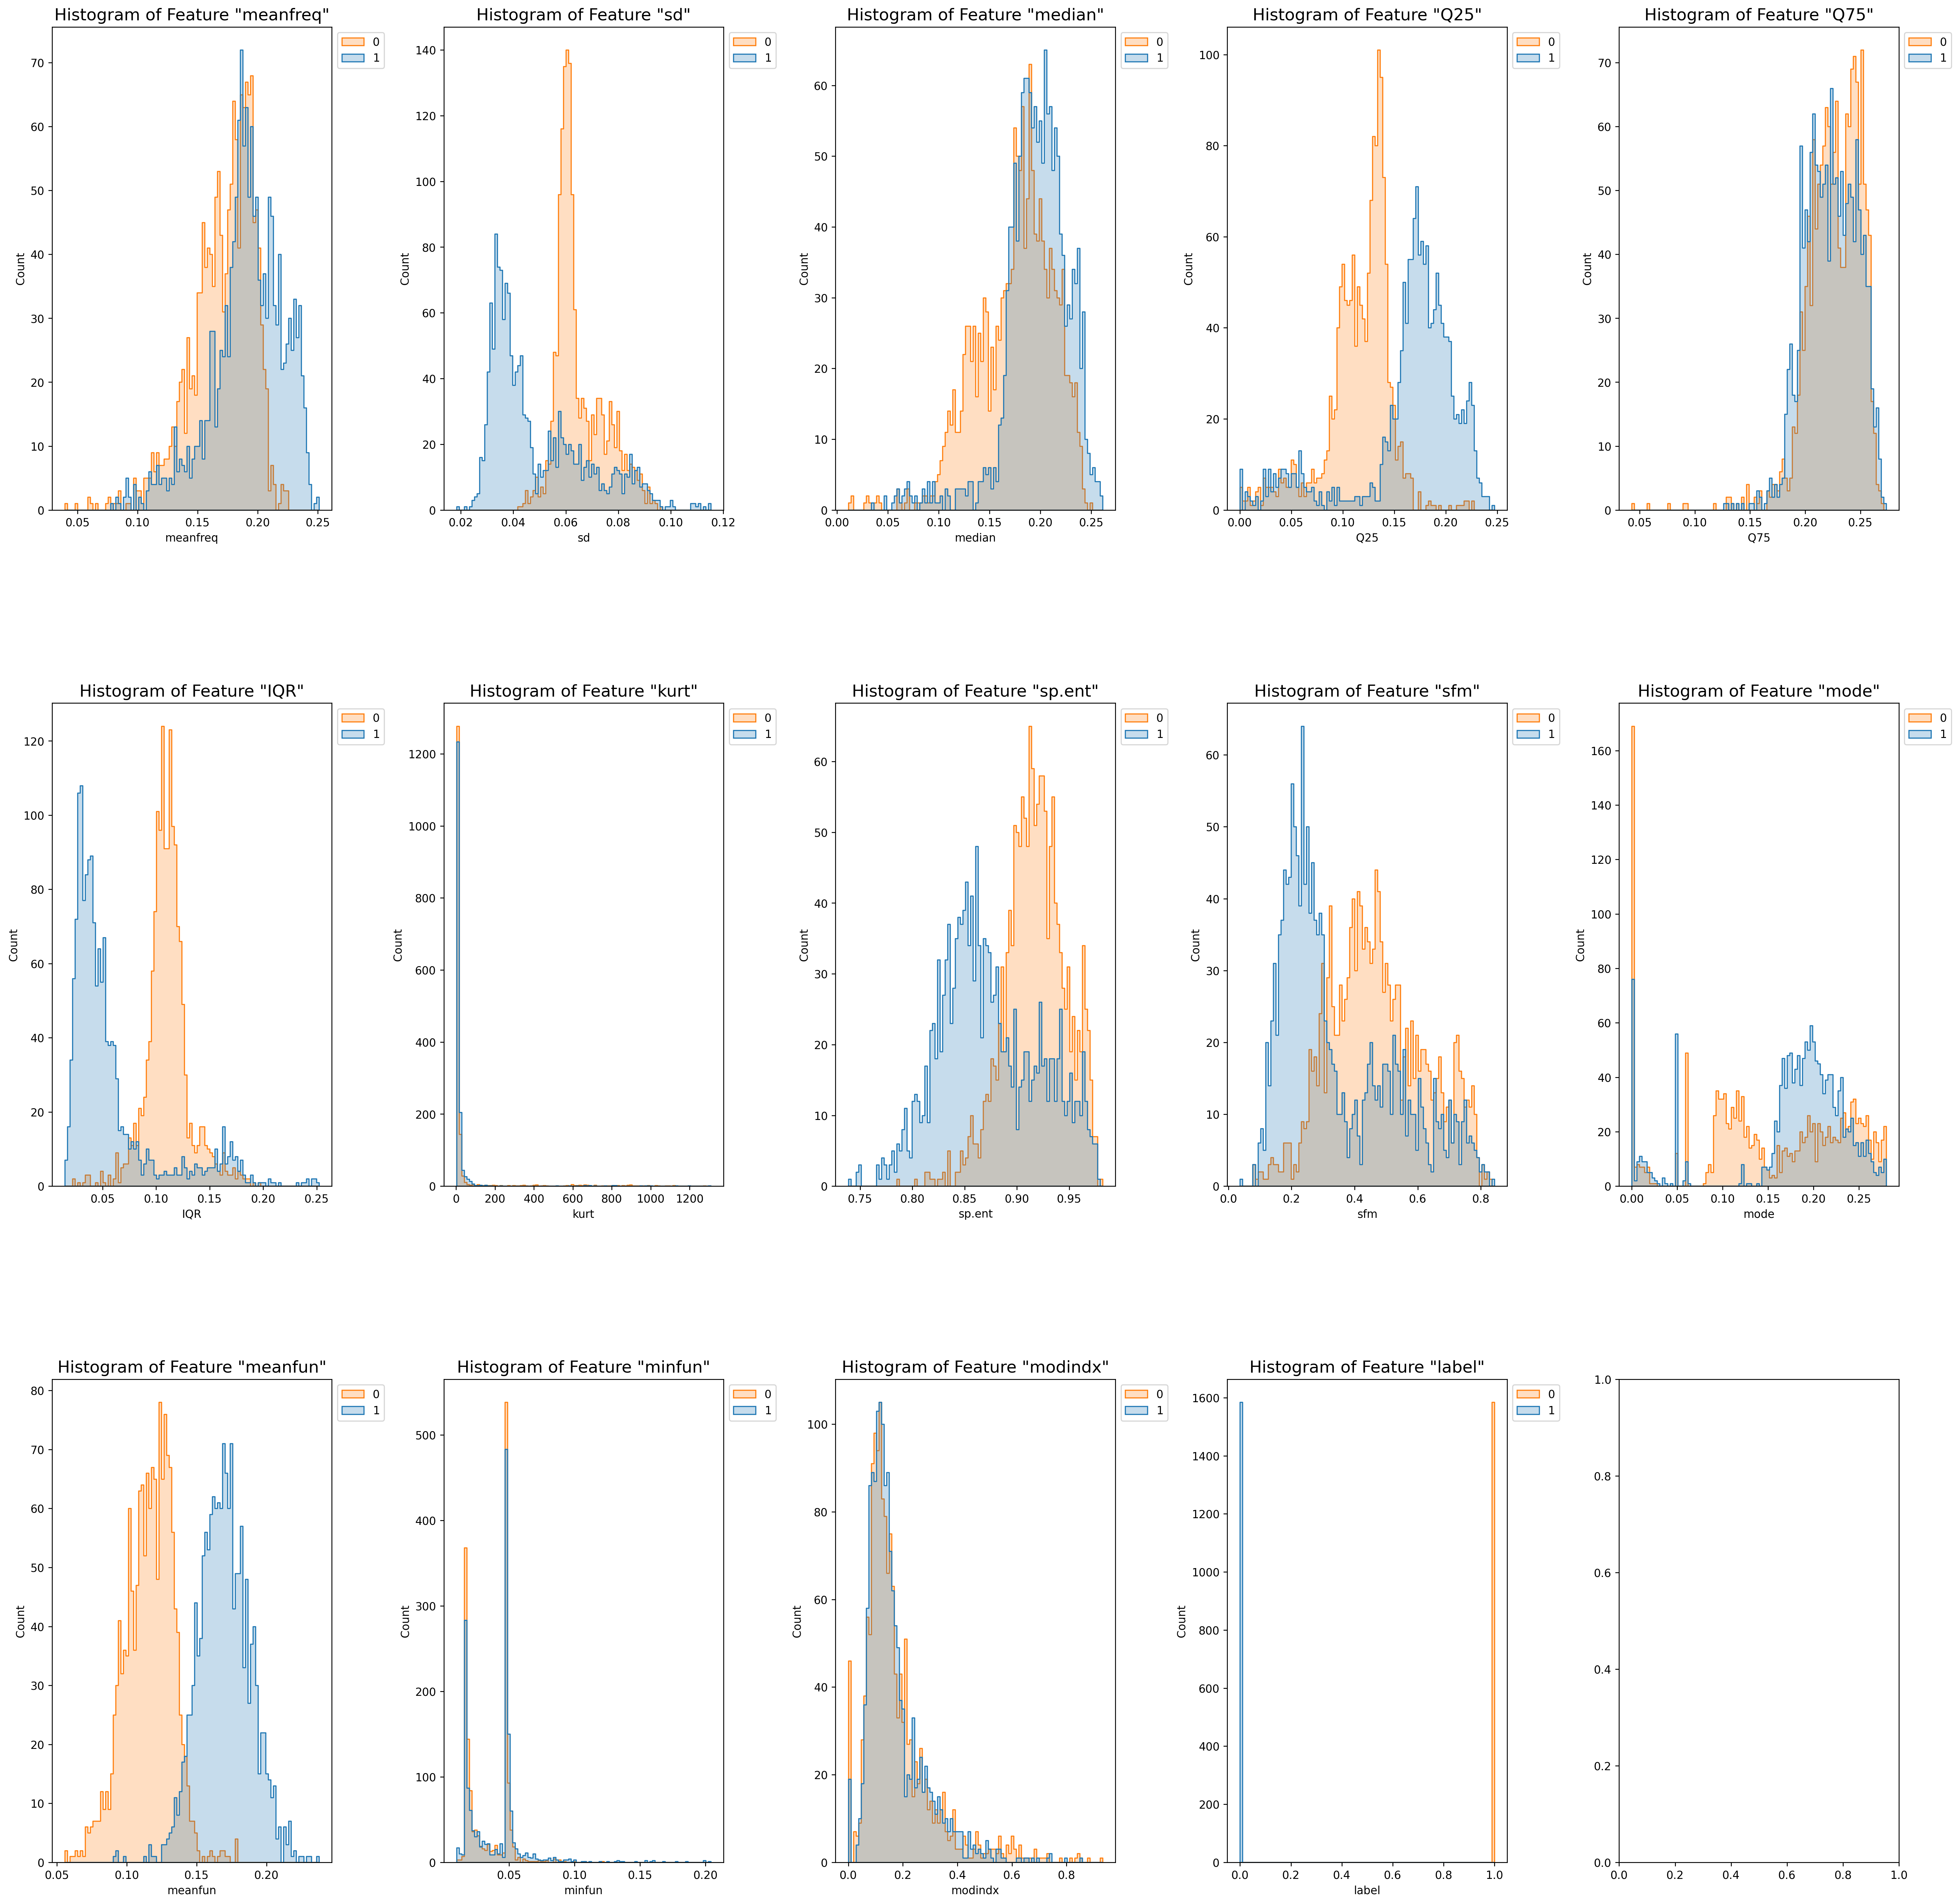

In [30]:
fig, axes = plt.subplots(3, 5, figsize=(30,30),dpi=250)
fig.subplots_adjust(wspace=0.4, hspace=0.4)
column = 0

for i in range(len(axes)):
    for j in range(len(axes[i])):
        if (column == len(df.columns)):
            break
        sns.histplot(x=df.columns[column], data=df, hue='label', bins=100,
                    ax=axes[i,j], element='step', discrete=False)
        axes[i,j].set_title(f'Histogram of Feature "{df.columns[column]}"', fontsize=15)
        axes[i,j].legend(df['label'].unique()[::-1], bbox_to_anchor=(1, 1), loc=2)
        column += 1

##### Heatmap (illustrating correlation between various features)

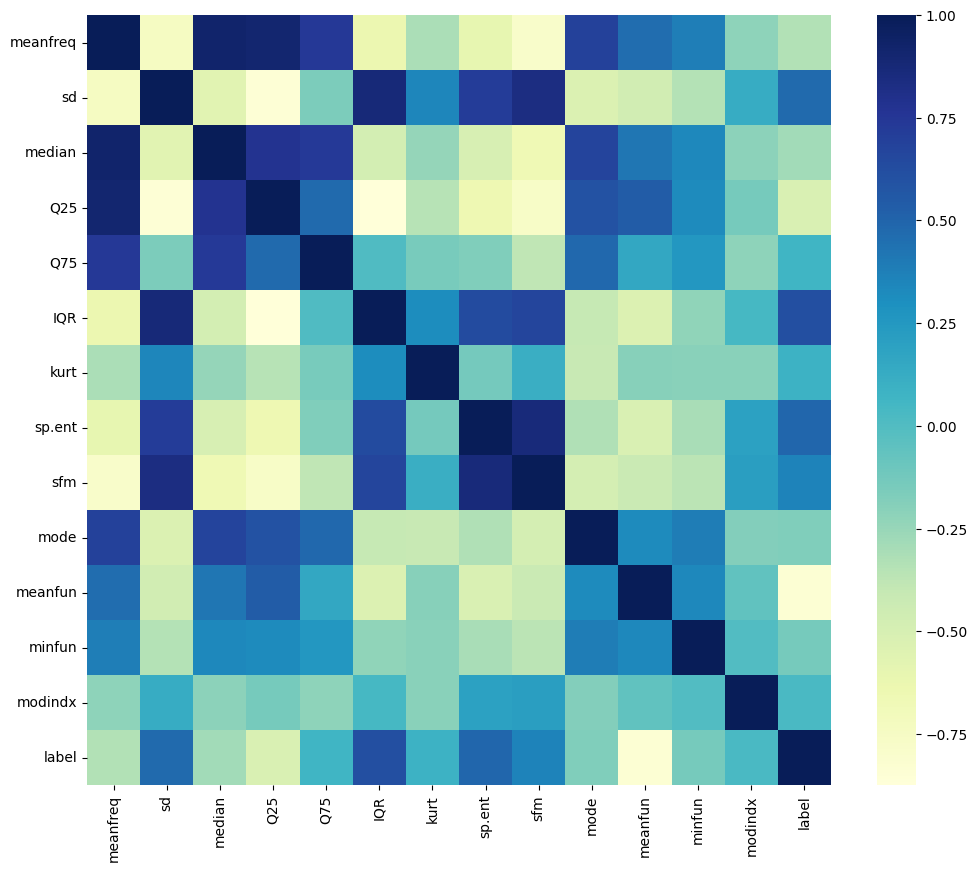

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(method='pearson'), cmap='YlGnBu')
plt.show()

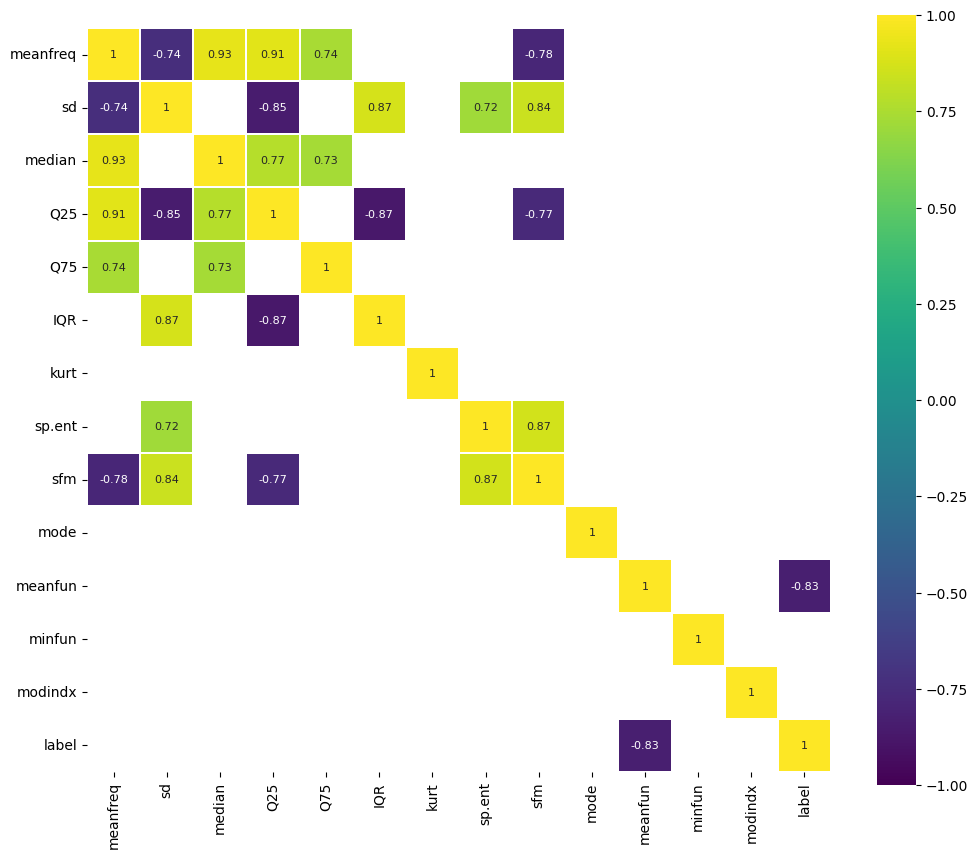

In [32]:
corr = df.corr()
plt.figure(figsize=(12, 10))

threshold_corr = 0.7
sns.heatmap(corr[(corr >= threshold_corr) | (corr <= -threshold_corr)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

##### Boxplots on all the features (denoting the outliers in each feature)

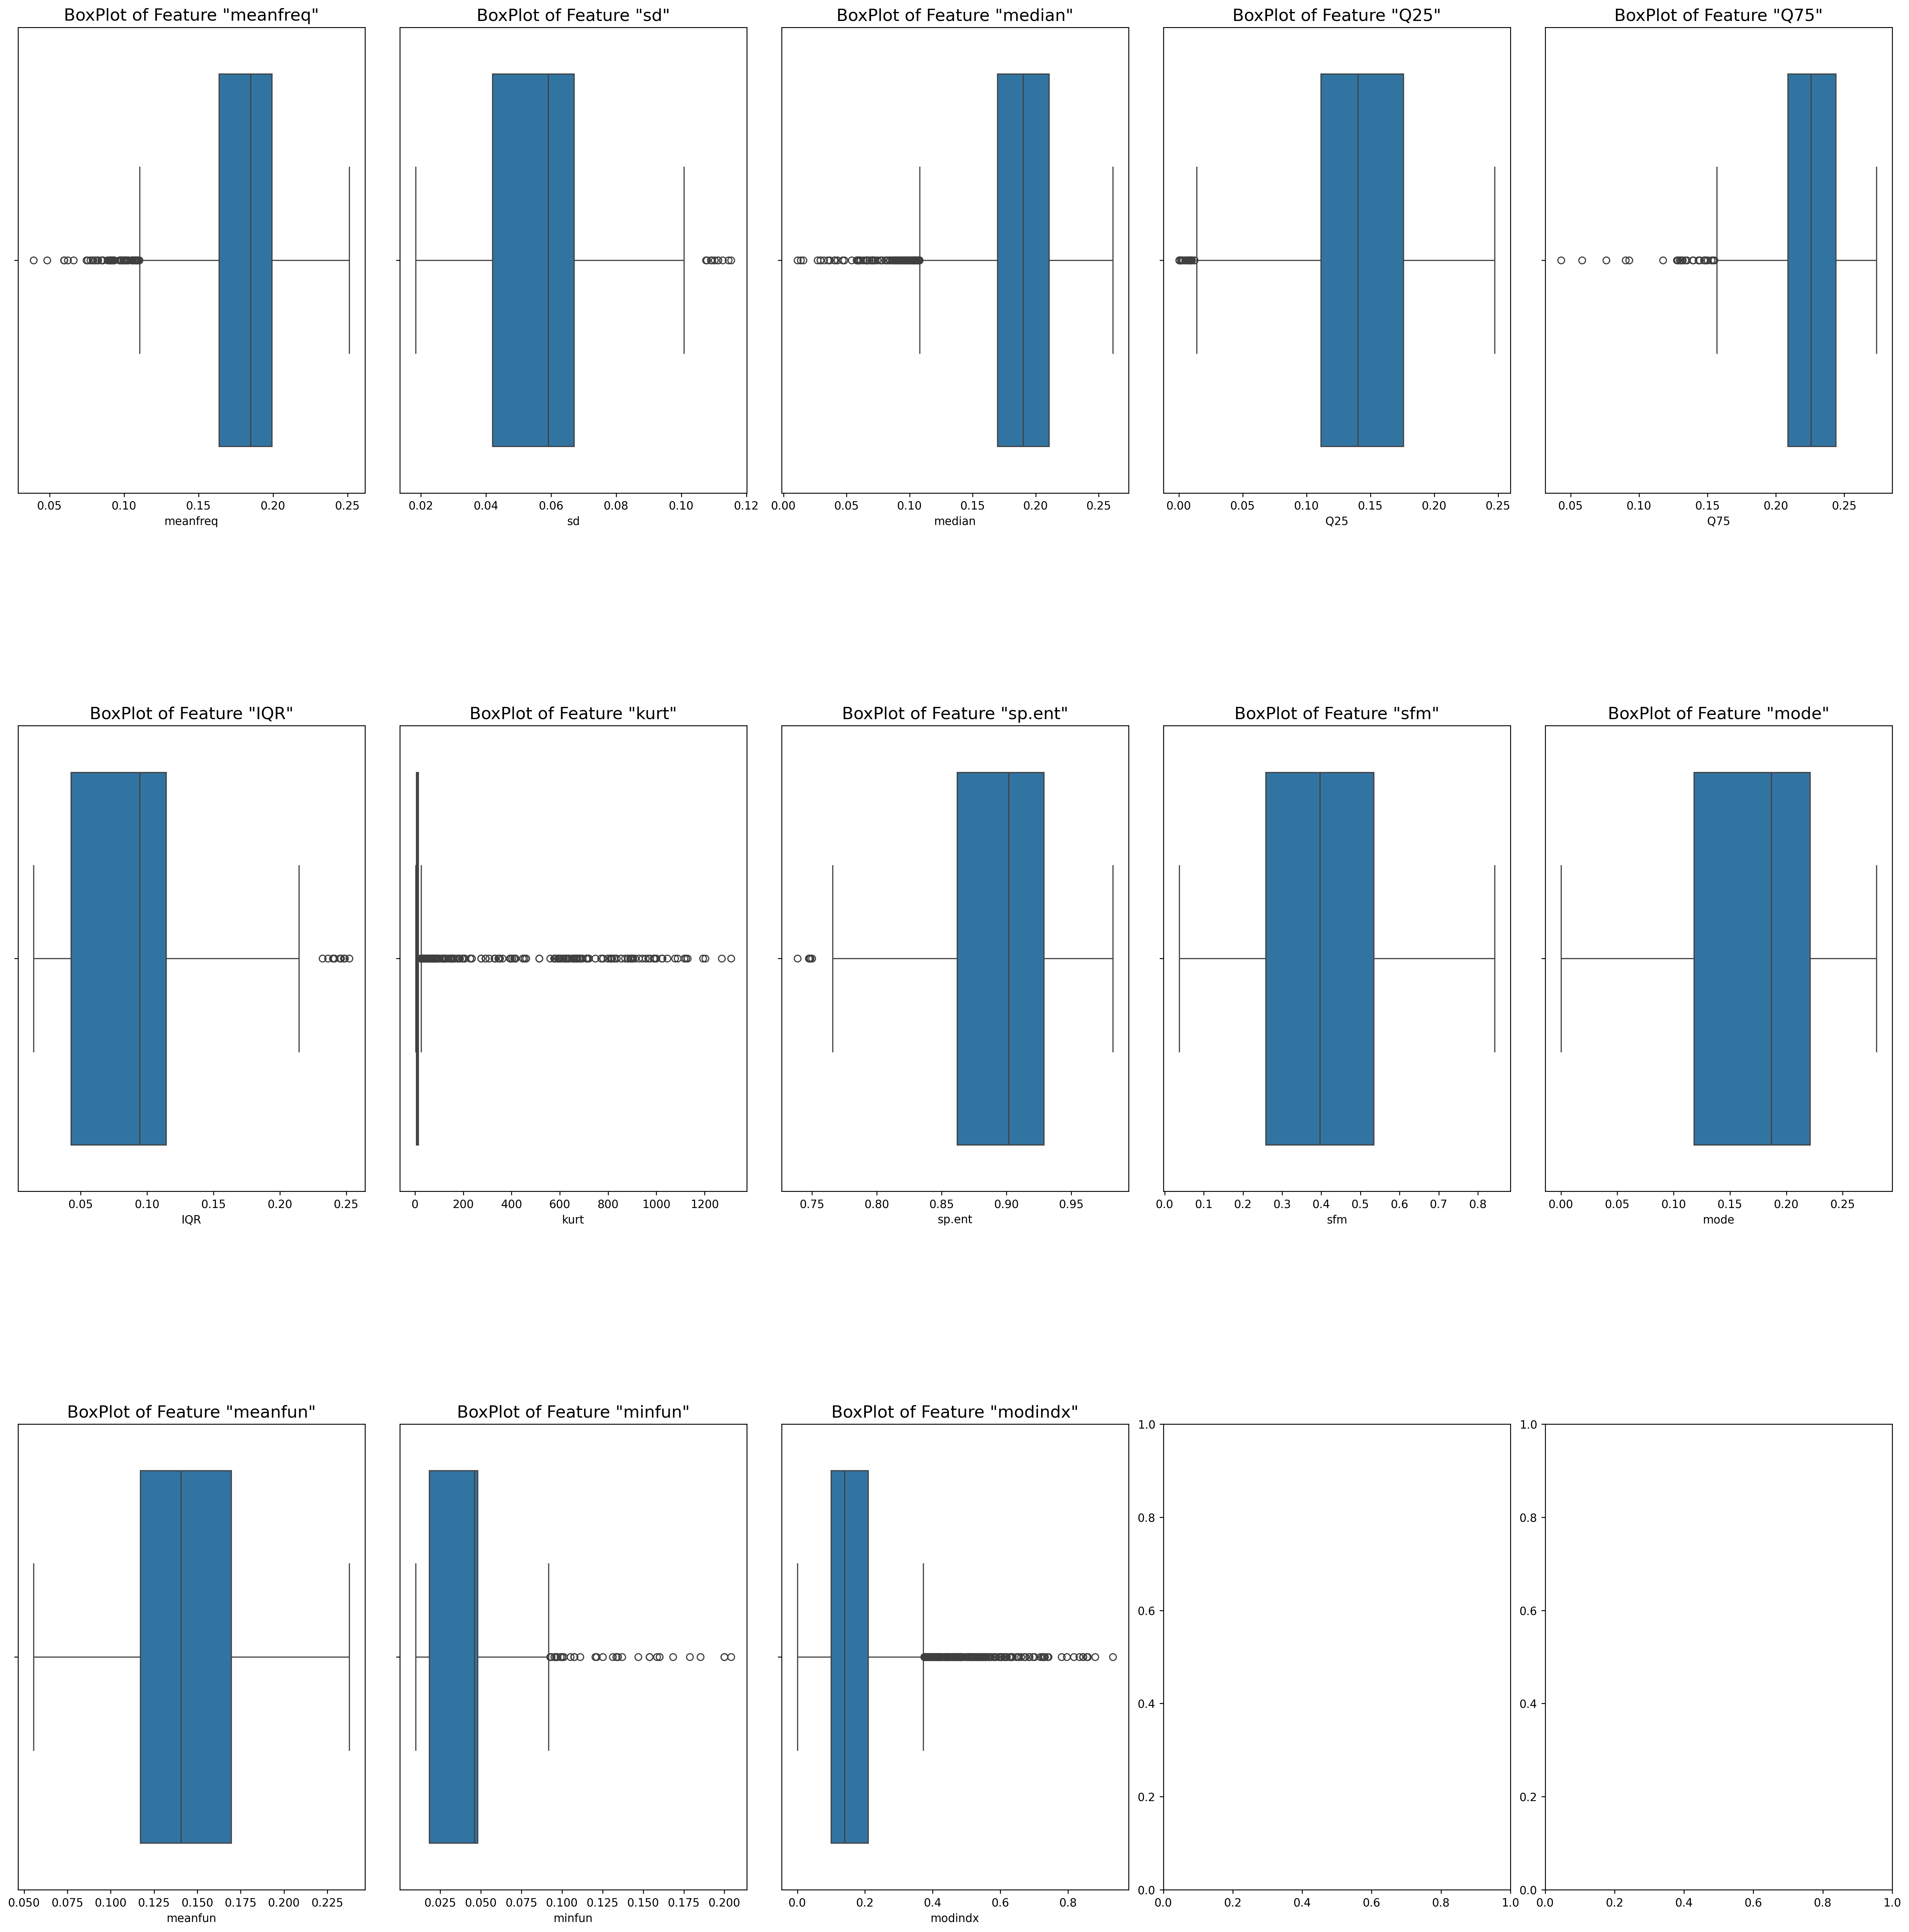

In [33]:
fig, axes = plt.subplots(3, 5, figsize=(30,30),dpi=250)
fig.subplots_adjust(wspace=0.1, hspace=0.5)
column = 0

for i in range(len(axes)):
    for j in range(len(axes[i])):
        if (column == len(df.columns)-1):
            break
        sns.boxplot(x=df.columns[column], data=df, ax=axes[i,j])   # outlier
        axes[i,j].set_title(f'BoxPlot of Feature "{df.columns[column]}"', fontsize=15)
        column += 1

##### Pairplot on the entire Dataset (illustrating correlation b/w every pair of features )

In [34]:
figure = sns.pairplot(data=df, hue='label', markers='+');

Output hidden; open in https://colab.research.google.com to view.

##### Checking Missing values in Dataset

In [36]:
print("Count of null values in each feature/column:")
df.isnull().sum()

Count of null values in each feature/column:


,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
kurt,0
sp.ent,0
sfm,0
mode,0


#### TSNE on the given Dataset


In [37]:
from sklearn.manifold import TSNE

In [38]:
x = df.drop('label', axis=1)
y = df['label']

model = TSNE(n_components=2, random_state=49)
TSNE_Dataset = model.fit_transform(x)

tsne_data = pd.DataFrame(data=TSNE_Dataset, columns=['Dimension 1','Dimension 2'])
tsne_data['label'] = df['label']

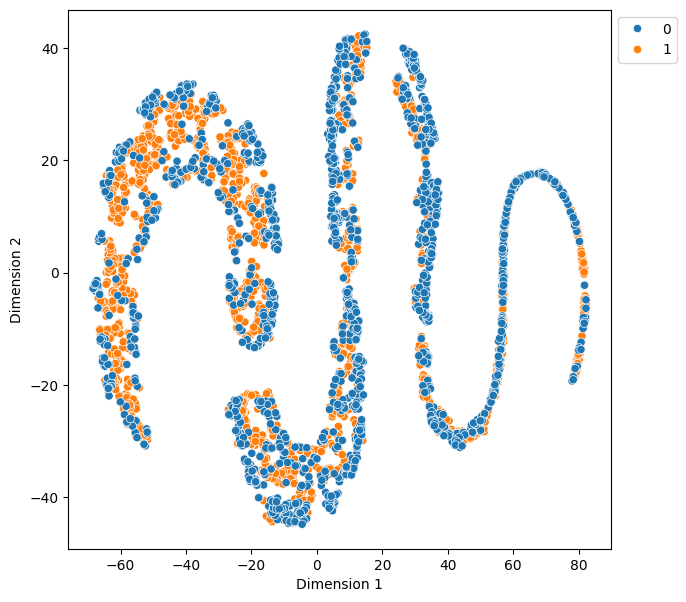

In [39]:
#0- female; 1- male
plt.figure(figsize=(7,7));
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='label', data=tsne_data)
plt.legend(bbox_to_anchor=(1, 1), loc=2);

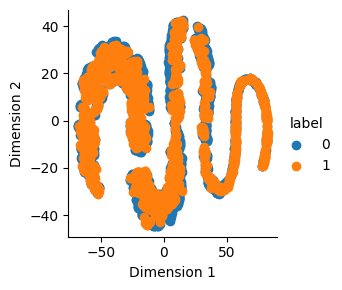

In [41]:
#0- female; 1- male
sns.FacetGrid(tsne_data, hue="label").map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend();

### Feature Importance Graph


In [42]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/assests/feature_selected_voice_data.csv')
x = df.drop('label', axis=1)
y = df['label']

feature_names = df.columns[:-1]

for feature_name in feature_names:
    df[feature_name] = df[feature_name] / df[feature_name].std()


In [45]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,label
0,1.998172,3.857814,0.880825,0.309605,3.815406,1.755881,2.033689,19.861694,2.771038,0.000000,2.608902,0.816946,0.000000,male
1,2.206334,4.042099,1.106396,0.398808,3.920009,1.712181,4.703329,19.835545,2.893875,0.000000,3.341230,0.823411,0.440600,male
2,2.584261,5.034121,1.009855,0.178741,5.580036,2.879807,7.596071,18.817211,2.697735,0.000000,3.055502,0.814548,0.389367,male
3,5.054780,4.330382,4.345725,1.984024,8.797022,2.603216,0.030959,21.416914,4.096593,1.086463,2.753952,0.925994,2.068732,male
4,4.516382,4.752878,3.428375,1.617105,8.716211,2.976055,0.032119,21.608837,4.413943,1.350484,3.293599,0.880919,1.743543,male


In [46]:
x = df[feature_names].values
y = df['label']

model = LogisticRegression()
model.fit(x, y)
score = model.score(x, y)
print(score)

0.9750631313131313


In [47]:
print(len(feature_names))

13


In [48]:
w0 = model.intercept_[0]

w = model.coef_[0]
w

array([-0.08914742,  0.12291721, -0.18662953, -0.92245745,  0.57449401,
        1.36702699, -0.59742882,  0.97692964, -1.35372137,  0.20189642,
       -5.0709009 ,  0.62547736, -0.36316563])

In [49]:
equation = f"{w0}"
for i in range(w.shape[0]):
    equation += f" + ({w[i]} * x{i+1})"

equation

'-0.03647184360120721 + (-0.08914741749455034 * x1) + (0.1229172052293365 * x2) + (-0.1866295322449599 * x3) + (-0.9224574499161381 * x4) + (0.5744940055097296 * x5) + (1.3670269938845228 * x6) + (-0.5974288224838407 * x7) + (0.9769296436154524 * x8) + (-1.3537213696573114 * x9) + (0.20189641698840965 * x10) + (-5.070900903222866 * x11) + (0.6254773614500864 * x12) + (-0.36316562897175747 * x13)'

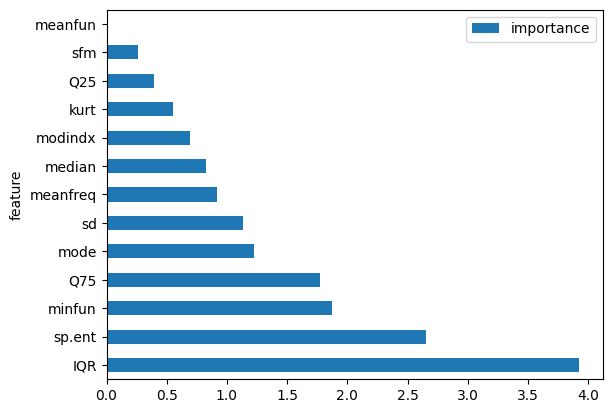

In [50]:
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(np.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
feature_importance.plot.barh(x='feature', y='importance');